In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
Path_Energy = 'my_BRENT2019.csv'
b_data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

In [3]:
b_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [22]:
b_data.shape[0]

2667

In [40]:
b_data_w=b_data.copy().resample('w').mean()

In [41]:
b_data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,d_rub
Дата,,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000,0.0
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667,0.0
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000,0.0
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000,0.0
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000,0.0


Найдем первые разности

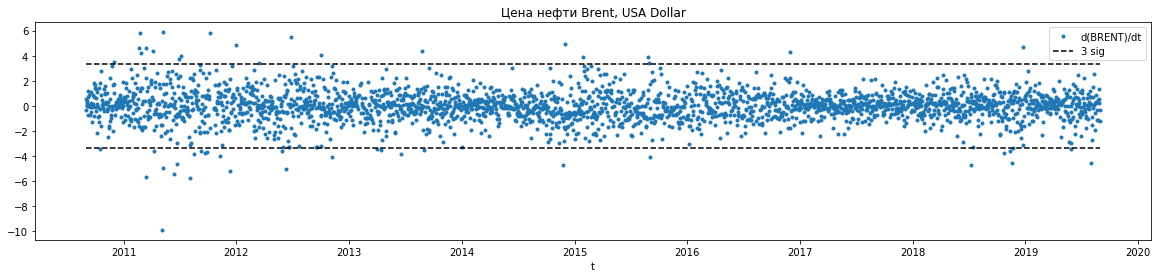

In [13]:
d_b_data = b_data['Значение'].values[1:] - b_data['Значение'].values[:-1]
s_brent = np.std(d_b_data)**0.5 *3
plt.figure(figsize=(20,4))
plt.plot(b_data.iloc[:-1].index,d_b_data,'.', label='d(BRENT)/dt')
plt.plot(b_data.iloc[[0,-1]].index,[s_brent, s_brent],'--k',label ='3 sig')
plt.plot(b_data.iloc[[0,-1]].index,[-s_brent, -s_brent],'--k')
plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

ind_anomal_brent = np.where( abs(d_b_data)>s_brent)[0]

In [8]:
rub_doll=pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll.head()

,curs
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [34]:
rub_doll.shape[0]

2228

In [9]:
rub_e=pd.read_excel('R_E01_09_2010_T01_09_2019.xlsx')
rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_e.head()

,curs
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


In [10]:
d_rub_doll = rub_doll['curs'].values[1:] - rub_doll['curs'].values[:-1]

In [11]:
d_rub_e = rub_e['curs'].values[1:] - rub_e['curs'].values[:-1]

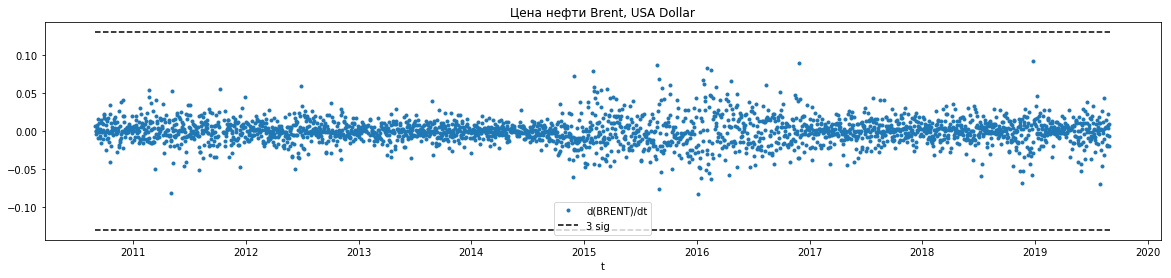

In [15]:
d_b_data1 = (b_data['Значение'].values[1:]- b_data['Значение'].values[:-1])/b_data['Значение'].values[:-1]

s_brent1 = np.std(d_b_data1)**0.5 
plt.figure(figsize=(20,4))
plt.plot(b_data.iloc[:-1].index,d_b_data1,'.', label='d(BRENT)/dt')
plt.plot(b_data.iloc[[0,-1]].index,[s_brent1, s_brent1],'--k',label ='3 sig')
plt.plot(b_data.iloc[[0,-1]].index,[-s_brent1, -s_brent1],'--k')
plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

ind_anomal_brent1 = np.where( abs(d_b_data1)>s_brent1)[0]

In [16]:
b_data.index[[0,-1]]

DatetimeIndex(['2010-09-01', '2019-09-01'], dtype='datetime64[ns]', name='Дата', freq=None)

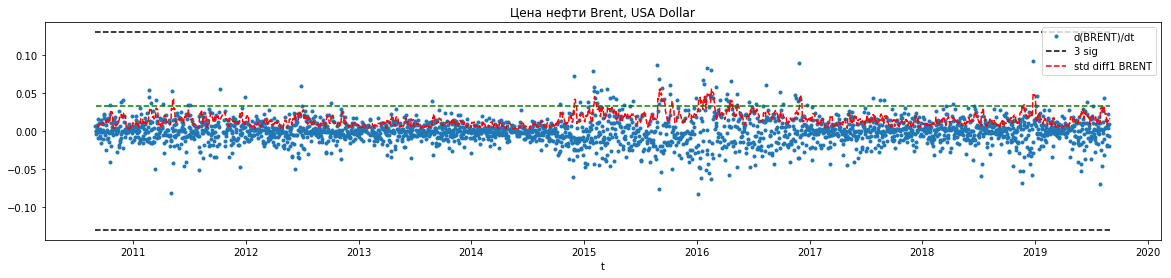

In [28]:
b_diff1=pd.DataFrame(data=d_b_data1, index=b_data.index[1:])

b_diff1_std=b_diff1[0].rolling(7).std()
b_diff_std=np.std(b_diff1_std)*4

ind_anomal_brent2 = np.where( abs(b_diff1_std)>b_diff_std)[0]

plt.figure(figsize=(20,4))
plt.plot(b_data.iloc[:-1].index,d_b_data1,'.', label='d(BRENT)/dt')
plt.plot(b_data.iloc[[0,-1]].index,[s_brent1, s_brent1],'--k',label ='3 sig')
plt.plot(b_data.iloc[[0,-1]].index,[-s_brent1, -s_brent1],'--k')
plt.plot(b_diff1_std,'--r',label ='std diff1 BRENT')
plt.plot(b_diff1_std.iloc[[0,-1]].index,[b_diff_std,b_diff_std],'--g')
plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

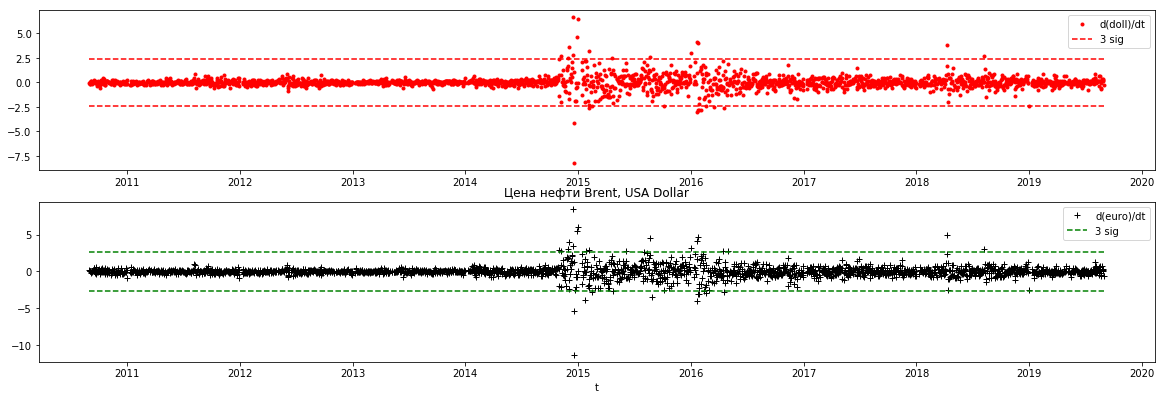

In [21]:
s_rub = np.std(d_rub_doll)**0.5 *3
s_rube = np.std(d_rub_e)**0.5 *3

plt.figure(figsize=(20,10))
plt.subplot(3,1,2)
plt.plot(rub_doll.iloc[:-1].index,d_rub_doll,'.r', label='d(doll)/dt')
plt.plot(rub_doll.iloc[[0,-1]].index,[s_rub, s_rub],'--r',label ='3 sig')
plt.plot(rub_doll.iloc[[0,-1]].index,[-s_rub, -s_rub],'--r')
plt.legend()

plt.subplot(3,1,3)
plt.plot(rub_e.iloc[:-1].index,d_rub_e,'+k', label='d(euro)/dt')
plt.plot(rub_e.iloc[[0,-1]].index,[s_rube, s_rube],'--g',label ='3 sig')
plt.plot(rub_e.iloc[[0,-1]].index,[-s_rube, -s_rube],'--g')

plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()


ind_anomal_rubl_d = np.where( abs(d_rub_doll)>s_rub)[0]
ind_anomal_rubl_e = np.where( abs(d_rub_e)>s_rube)[0]

In [29]:
b_diff1.head()

,0
Дата,
2010-09-02,0.006809
2010-09-03,-0.004162
2010-09-04,0.000653
2010-09-05,0.000131
2010-09-06,0.003132


In [38]:
b_data['d_rub'] = 0
#b_data['d_rub'].values[1:2228]=d_rub_doll.values[:]

In [39]:
b_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,d_rub
Дата,,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0,0
